Con il termine $text\; mining$ indichiamo tutti quei metodi utilizzati per estrarre informazioni rilevanti da grandi e molto spesso non strutturate collezioni di documenti testuali. Un altro termine usato spesso in luogo di text mining è $information \; retrival$. 
Per esempio, in un dato database medico vogliamo trovare tutti gli abstract che parlano di una certa sindrome. Per cui, scriviamo una frase, una $query$, contenente parole chiave rilevanti ad identificare la sindrome cercata. Il sistema di ricerca è usato per fare un match tra la query scritta e tutti i documenti presenti nel database, che verranno "ordinati" a seconda della loro rilevanza alla query.  

Le parole chiave che hanno informazioni riguardo il contenuto di un certo documento si dicono $terms$. Un primo passo base consiste nel creare una lista di tutti i $terms$ di una collezione di documenti, cioè nel creare un $index$. Per ogni $term$ si memorizza una lista di tutti i documenti che contengono quel $term$ specifico.

Prima di creare l'index serve fare il pre-processing:

1) Si eliminano tutte le cosi dette "stop words": congiunzioni, articoli, avverbi, ecc. 

2) Stemming: per ogni parola si mantiene soltanto la radice del termine, togliendo ogni tipo di "suffisso"

<div>
<img src="attachment:stemming.png" width="400"/>
</div>

# Il modello spazio vettoriale

Viene creata una matrice $term-document$, dove ogni vettore colonna rappresenta un documento. 
Ogni colonna ha elementi diversi da zero nelle posizioni corrispondenti ai $terms$ che posso essere trovati nel documento corrispondente. Questo valore riflette l'importanza della parola chiave in relazione al documento preso in esame. Di solito il valore assegnato è una funzione della frequenza con cui quella parola occorre nel documento. 


Per problemi realistici vengono utilizzati i così detti $text\; parsers$. Questi oggetti ci permettono di rimuovere automaticamente le stop words e di fare lo stemming. Inoltre, consentono di aggiungere dei filtri per rimuovere per esempio codici formattati dentro i documenti. 

In generale, per ogni parola chiave viene contata la frequenza di occorrenza, ma anche un peso specifico. 


In [19]:
import sklearn
import numpy as np
import sklearn.feature_extraction

np.set_printoptions(suppress=True)

vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)

documents = [
    'How to Bake Bread Without Recipes',
    'The Classic Art of Viennese Pastry',
    'Numerical Recipes: The Art of Scientific Computing',
    'Breads, Pastries, Pies and Cakes: Quantity Baking Recipes',
    'Pastry: A Book of Best French Recipes',
    'Numerical Python',
    'Baking at the 20th Century Cafe: Iconic European Desserts from Linzer Torte to Honey Cake',
    'Python Cookbook: Recipes for Mastering Python',
    'Understanding Baking: The Art and Science of Baking'
]

X = vectorizer.fit_transform(documents).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = X.T
print(A.shape)
print(A)

print(A[28,0])


vectorizer.vocabulary_: {'how': 23, 'to': 38, 'bake': 4, 'bread': 8, 'without': 42, 'recipes': 34, 'the': 37, 'classic': 14, 'art': 2, 'of': 28, 'viennese': 41, 'pastry': 30, 'numerical': 27, 'scientific': 36, 'computing': 15, 'breads': 9, 'pastries': 29, 'pies': 31, 'and': 1, 'cakes': 12, 'quantity': 33, 'baking': 5, 'book': 7, 'best': 6, 'french': 20, 'python': 32, 'at': 3, '20th': 0, 'century': 13, 'cafe': 10, 'iconic': 24, 'european': 18, 'desserts': 17, 'from': 21, 'linzer': 25, 'torte': 39, 'honey': 22, 'cake': 11, 'cookbook': 16, 'for': 19, 'mastering': 26, 'understanding': 40, 'science': 35}
(43, 9)
[[0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 2]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0

Adesso installiamo ``Gensim``: una libreria Python open-source che ci aiuta nel preprocessing dei documenti, rappresentati semanticamente come vettori.

In [20]:
!pip install --upgrade gensim

  Using cached gensim-4.3.2-cp38-cp38-macosx_10_9_x86_64.whl.metadata (8.5 kB)
Using cached gensim-4.3.2-cp38-cp38-macosx_10_9_x86_64.whl (24.1 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0

[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
#!pip install python-Levenshtein

In [4]:
from gensim.parsing.preprocessing import remove_stopwords, stem_text


In [5]:
L = []
for i in range(len(documents)):
    L.append(remove_stopwords(documents[i]))
print('\n Lista di documenti senza stop words\n ', L)

L_final = []
for i in range(len(documents)):
    L_final.append(stem_text(L[i]))
print('\n Lista di documenti dopo stemming \n ', L_final)


 Lista di documenti senza stop words
  ['How Bake Bread Without Recipes', 'The Classic Art Viennese Pastry', 'Numerical Recipes: The Art Scientific Computing', 'Breads, Pastries, Pies Cakes: Quantity Baking Recipes', 'Pastry: A Book Best French Recipes', 'Numerical Python', 'Baking 20th Century Cafe: Iconic European Desserts Linzer Torte Honey Cake', 'Python Cookbook: Recipes Mastering Python', 'Understanding Baking: The Art Science Baking']

 Lista di documenti dopo stemming 
  ['how bake bread without recip', 'the classic art viennes pastri', 'numer recipes: the art scientif comput', 'breads, pastries, pi cakes: quantiti bake recip', 'pastry: a book best french recip', 'numer python', 'bake 20th centuri cafe: icon european dessert linzer tort honei cake', 'python cookbook: recip master python', 'understand baking: the art scienc bake']


In [21]:
Y = vectorizer.fit_transform(L_final).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = Y.T
print(A.shape)

vectorizer.vocabulary_: {'how': 19, 'bake': 2, 'bread': 6, 'without': 38, 'recip': 30, 'the': 34, 'classic': 12, 'art': 1, 'viennes': 37, 'pastri': 24, 'numer': 23, 'recipes': 31, 'scientif': 33, 'comput': 13, 'breads': 7, 'pastries': 25, 'pi': 27, 'cakes': 10, 'quantiti': 29, 'pastry': 26, 'book': 5, 'best': 4, 'french': 17, 'python': 28, '20th': 0, 'centuri': 11, 'cafe': 8, 'icon': 20, 'european': 16, 'dessert': 15, 'linzer': 21, 'tort': 35, 'honei': 18, 'cake': 9, 'cookbook': 14, 'master': 22, 'understand': 36, 'baking': 3, 'scienc': 32}
(39, 9)


In [23]:
 #query vector
query1text = ['Baking Pies']
query_stem = query1text[0]#stem_text(query1text[0])
query1 = []
query1.append(query_stem)
query1 = vectorizer.transform(query1).toarray()
query1

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [25]:
(m,n)=A.shape
print(A.shape)
eu=np.array(np.zeros(n))
for i in range(n):
    eu[i] = np.linalg.norm(A[:,i],2)

An= np.dot(A,np.diag(1/eu))
print(An.shape)

(39, 9)
(39, 9)


Calcoliamo la coseno-similarità (SAM) tra ogni documento e il vettore ``query1``

In [26]:
query1

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [27]:
np.dot(An.T,query1.T)/np.linalg.norm((query1),2)


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.40824829]])

In [10]:
ei=np.array(np.zeros(n))
for i in range(n):
    ei[i] = np.linalg.norm(A[:,i],np.Inf)

Ai= np.dot(A,np.diag(1/ei))


In [11]:
np.dot(Ai.T,query1.T)/np.linalg.norm((query1),2)


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [28]:
e1=np.array(np.zeros(n))
for i in range(n):
    e1[i] = np.linalg.norm(A[:,i],1)

A1= np.dot(A,np.diag(1/e1))

In [29]:
np.dot(A1.T,query1.T)/np.linalg.norm((query1),2)


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.16666667]])

In [30]:
U, s, V = np.linalg.svd(An, full_matrices=True)

In [31]:
r = np.linalg.matrix_rank(An)
print('Rango della matrice piena ', r)

Rango della matrice piena  9


In [32]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Singular values')

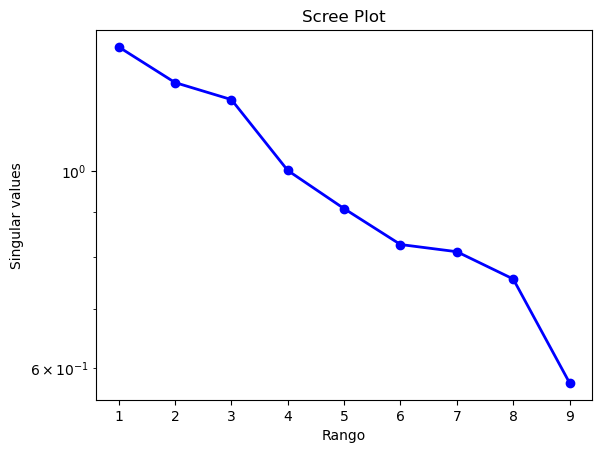

In [33]:
plt.semilogy(np.linspace(1,9,9), s, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Rango')
plt.ylabel('Singular values')

In [34]:
S = s[0:4]*np.eye(4,4)
An4 = np.dot(U[:,0:4], np.dot( S,  V[0:4,:]))

In [44]:
np.dot(An4.T,query1.T)/np.linalg.norm((query1),2)

array([[ 0.05302357],
       [ 0.12632475],
       [ 0.11066535],
       [ 0.04954923],
       [-0.00508518],
       [-0.01802898],
       [ 0.06110957],
       [-0.0331548 ],
       [ 0.14925378]])

In [35]:
Ui, si, Vi = np.linalg.svd(Ai, full_matrices=True)

In [36]:
Si = si[0:4]*np.eye(4,4)
Ai4 = np.dot(Ui[:,0:4], np.dot( Si,  Vi[0:4,:]))

In [37]:
np.dot(Ai4.T,query1.T)/np.linalg.norm((query1),2)


array([[ 0.07354222],
       [ 0.28200103],
       [ 0.28008438],
       [ 0.20609459],
       [-0.1894879 ],
       [ 0.00890627],
       [ 0.04142802],
       [-0.0198209 ],
       [ 0.42221449]])

In [38]:
U1, s1, V1 = np.linalg.svd(A1, full_matrices=True)

In [39]:
S1 = s1[0:4]*np.eye(4,4)
A14 = np.dot(U1[:,0:4], np.dot( S1,  V1[0:4,:]))

In [40]:
np.dot(An4.T,query1.T)/np.linalg.norm((query1),2)

array([[ 0.05302357],
       [ 0.12632475],
       [ 0.11066535],
       [ 0.04954923],
       [-0.00508518],
       [-0.01802898],
       [ 0.06110957],
       [-0.0331548 ],
       [ 0.14925378]])

In [41]:
import scipy.sparse as sparse
As=sparse.csr_matrix(An)

In [42]:
import scipy as sp
u4, s4, v4t = sp.sparse.linalg.svds(As,k=4, solver='arpack')
s4

array([1.00129368, 1.20279701, 1.25699909, 1.37844272])

In [46]:
s

array([1.37844272, 1.25699909, 1.20279701, 1.00129368, 0.90710131,
       0.82672274, 0.81148296, 0.75615318, 0.57789598])

In [47]:
from sklearn.decomposition import TruncatedSVD

In [49]:
svdA = TruncatedSVD(n_components=4, n_iter=1, random_state=42)
svdA.fit(An)

TruncatedSVD(n_components=4, n_iter=1, random_state=42)

In [50]:
svdA.singular_values_

array([1.37844272, 1.25699909, 1.20279701, 1.00129368])

In [51]:
svdA

TruncatedSVD(n_components=4, n_iter=1, random_state=42)